In [2]:
from copy import deepcopy
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

## Reference
1. http://stanford.edu/~cpiech/cs221/handouts/kmeans.html
2. https://mubaris.com/2017/10/01/kmeans-clustering-in-python/

## Importing The Data

In [30]:
data_df = pd.read_csv('xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


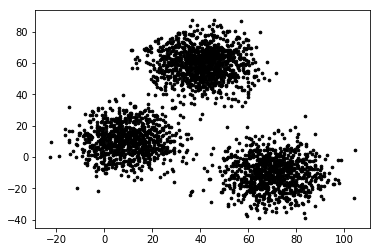

In [31]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [32]:
df_matrix = data.as_matrix()
df_matrix

C:\Users\Jiazhen\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

## Create K-Means Algorithm

In [169]:
# Number of clusters
k = 3
# Number of training data
n_datapoint = data.shape[0]
# Number of features in the data
n_features = data.shape[1]

In [170]:
mean = np.mean(df_matrix, axis=0)
std = np.std(df_matrix, axis=0)
centres = np.random.randn(k, n_features) * std + mean

new_centres = deepcopy(centres)
old_centres = np.zeros(centres.shape)

def dis(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

def should_stop(old_centres, new_centres, iterations):
    if iterations > 300:
        return True
    return np.linalg.norm(new_centres - old_centres) == 0

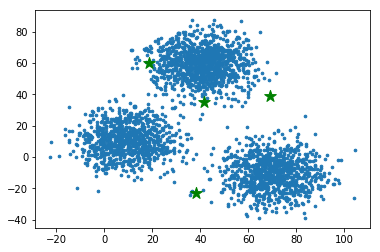

In [171]:
# Plot the data and the centers generated as random
plt.scatter(df_matrix[:,0], df_matrix[:,1], s=7)
plt.scatter(centres[:,0], centres[:,1], marker='*', c='g', s=150)

In [172]:
distances = np.zeros((n_datapoint, k))
labels = np.zeros(n_datapoint)
iterations = 0

while not should_stop(old_centres, new_centres, iterations):
    for i in range(k):
        distances[:, i] = dis(df_matrix, new_centres[i])
    labels = np.argmin(distances, axis=1)
    old_centres = deepcopy(new_centres)
    for i in range(k):
        new_centres[i] = np.mean(df_matrix[labels==i], axis=0)

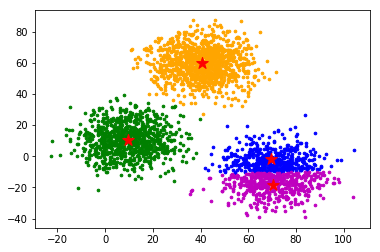

In [174]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green', 'm']
for i in range(k):
    plt.scatter(df_matrix[labels==i, 0], df_matrix[labels==i,1], s=7, color = colors[i])
plt.scatter(new_centres[:,0], new_centres[:,1], marker='*', c='r', s=150)

In [ ]:
# class KMeans:
#     def __init__(self, n_clusters=2, max_iter=300):
#         self.n_clusters = n_clusters
#         self.max_iter = 300
    
#     def fit(self, data):
#         # Initialize centroids randomly
#         n_datapoint = data.shape[0]
#         n_features = data.shape[1]
#         centroids = self.get_random_centroids(data, self.n_clusters)
#         new_centroids = deepcopy(centroids)
#         old_centroids = np.zeros(centers.shape)
        
#         labels = np.zeros(n_datapoint)
#         distances = np.zeros((n_datapoint, self.n_clusters))
#         # Initialize book keeping vars.
#         iterations = 0
        
#         # Run the main KMeans algorithm
#         while not self.should_stop(old_centroids, new_centroids, iterations):
#             # Save old centroids for convergence test. Book keeping.
#             old_centroids = new_centroids
#             iterations += 1
            
#             # step 1: calculate distance between data and each centre
#             for i in range(self.n_clusters):
#                 distances[:, i] =  self.dis(data, new_centroids)
            
#             # step 2: assign labels to each datapoint distance
#             labels = np.argmin(distances, axis = 1)
            
#             old_centroids = deepcopy(new_centers)
#             # step 3: calculate new centres 
#             for i in range(self.n_clusters):
#                 new_centroids[i] = np.mean(data[labels == i], axis=0)
        
#         return centroids
    
#     def dis(self, a, b, ax=1):
#         return np.linalg.norm(a - b, axis=ax)
    
#     # Function: Should Stop
#     # -------------
#     # Returns True or False if k-means is done. K-means terminates either
#     # because it has run a maximum number of iterations OR the centroids
#     # stop changing.
#     def should_stop(self, old_centroids, centroids, iterations):
#         if iterations > self.max_iter:
#             return True
#         return old_centroids == centroids
    
# #     # Function: Get Labels
# #     # -------------
# #     # Returns a label for each piece of data in the dataset. 
# #     def getLabels(self, data_set, centroids):
# #         # For each element in the dataset, chose the closest centroid. 
# #         # Make that centroid the element's label.
# #         pass
    
# #     # Function: Get Centroids
# #     # -------------
# #     # Returns k random centroids, each of dimension n.
# #     def getCentroids(self, data_set, labels, k):
# #         # Each centroid is the geometric mean of the points that
# #         # have that centroid's label. Important: If a centroid is empty (no points have
# #         # that centroid's label) you should randomly re-initialize it.
# #         pass